In [1]:
%%time
###Reading new data from Stienn
import numpy as np
import time

pix_x = 200
pix_y = 200
dataset_x, dataset_y = 81, 81
dataset_size = 81*81



# load the data set hdf5 file
import h5py
# import numpy as np

#filename = '../Data/SPmap_Ba4d.nxs' #this is nature_small_things dataset
#filename = '../Data/i05-1-19123.nxs' #this is the Bi2Se3 data set
#filename = r'C:\Users\moh\Desktop\Aarhus University\Research\ARPES Imaging Intro\Resources\Data\i05-1-19123.nxs' #this is the Bi2Se3 data set
#filename = r'C:\Aarhus University\Research\ARPES Imaging Intro\Resources\Data\i05-1-19123.nxs' #this is the Bi2Se3 data set
#filename = r'C:/Aarhus University/Research/ARPES Imaging Intro/Resources/Data/i05-1-19123.nxs' #this is the Bi2Se3 data set
#filename = '../Data/steinn_14_jun/processed/misfit_VB_1024.h5' #This is stienn_14_jun new dataset
#filename = '../Data/steinn_14_jun/processed/misfit_VB_512.h5' #This is stienn_14_jun new dataset
#filename = '../Data/steinn_14_jun/processed/misfit_Bi5d_512.h5' #This is stienn_14_jun new dataset
filename = '../Data/steinn_14_jun/processed/misfit_Bi5d_1024.h5' #This is stienn_14_jun new dataset
#filename = '../Data/steinn_14_jun/processed/misfit_Se3d_512.h5' #This is stienn_14_jun new dataset
#filename = '../Data/steinn_14_jun/processed/misfit_Se3d_1024.h5' #This is stienn_14_jun new dataset
#filename = '../Data/steinn_14_jun/processed/misfit_VB_512.h5' #This is stienn_14_jun new dataset
#filename = '../Data/steinn_14_jun/processed/simBi_256x256_0001.h5' #This is stienn_14_jun simulated dataset one
#filename = '../Data/steinn_14_jun/processed/BiThick_512x256x256.h5' #This is stienn_14_jun simulated dataset one sample
#filename = '../Data/steinn_14_jun/simulated_final.h5' #This is stienn_14_jun simulated dataset final
#filename = '../Data/steinn_14_jun/processed/gr_flake_256.h5' #This is stienn_14_jun simulated dataset
f = h5py.File(filename, 'r')
if 'simulated_final' in filename:
    dataset = f['sim_data']
elif '.nxs' in filename:
    dataset = f['entry1']['analyser']['data']
    #dataset = dataset[:] # load completely in RAM
else:
    dataset = f['data']

#For i05-1-19123.nxs data
#dataset = f['entry1']['analyser']['data']
#dataset = dataset[:] # load completely in RAM

# print shape, dimensions and size
print('Dataset shape: ', dataset.shape)
print(filename)


## 2d dct




shape (12, 14, 256, 256)
CPU times: user 284 ms, sys: 745 ms, total: 1.03 s
Wall time: 336 ms


In [2]:
%%time

##Downsampling the dataset, ONLY RUN IF YOU WANT TO DOWNSAMPLE
from itertools import product
import skimage
from tqdm.notebook import tqdm
# decide on the size of the down-sampled images here.
pix_x = 256
pix_y = 256

data_red = np.zeros((dataset.shape[0],dataset.shape[1],pix_x,pix_y)) #block of data after downsampling
data_red_conv = np.zeros((dataset.shape[0],dataset.shape[1],pix_x,pix_y))#block of data after downsampling and convolution
tmp_image = np.zeros((pix_x,pix_y)) #temporary image
tmp_e_theta = np.zeros((data_red.shape[0],data_red.shape[1])) #temporary intensity for one angle and energy across sample


def resize(image):
    resized_image = skimage.transform.resize(image, (pix_x,pix_y), anti_aliasing=False)
    return resized_image

coordinate_grid = list(product(range(dataset.shape[0]),range(dataset.shape[1])))

# create a data set that is downsampled but has otherwise the same shape as before
for i, j in coordinate_grid:
    data_red[i,j,:,:] = resize(dataset[i,j,:,:])

# create a list of images to work further with
images = []
for i, j in coordinate_grid:
    images.append(data_red[i,j,:,:])

print("Shape",len(images))

Shape 168
CPU times: user 1.76 s, sys: 679 ms, total: 2.44 s
Wall time: 2.6 s


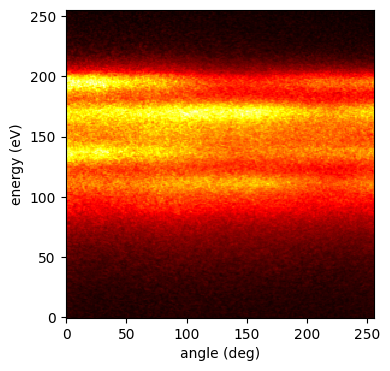

CPU times: user 967 ms, sys: 172 ms, total: 1.14 s
Wall time: 934 ms


In [3]:
%%time
##Displaying single image
#%matplotlib inline
import matplotlib.pyplot as plt

i_test = 4
j_test = 5
test_image = dataset[i_test,j_test,:,:]
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(test_image), cmap='hot', interpolation='none',origin='lower', aspect=1)
plt.xlabel('angle (deg)')
plt.ylabel('energy (eV)')
plt.show()

dataset shape (12, 14, 256, 256)
images_fulldataset shape 65536


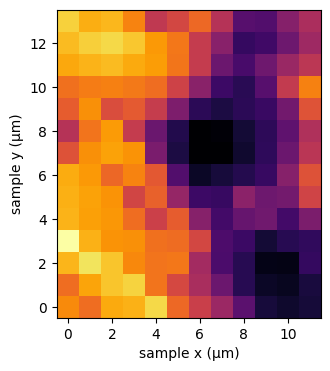

CPU times: user 1.61 s, sys: 344 ms, total: 1.95 s
Wall time: 2.08 s


In [4]:
%%time
# Drawing the full dataset intensity map
# create a list of images to work further with
from itertools import *

print("dataset shape",dataset.shape)
coordinate_grid = list(product(range(dataset.shape[0]),range(dataset.shape[1])))

images_fulldataset = []
for i, j in coordinate_grid:
    images_fulldataset.append(list(chain.from_iterable(dataset[i,j,:,:])))
    #example_img = dataset[i,j,:,:]

print("images_fulldataset shape", len(images_fulldataset[0]))
#print("images_fulldataset shape", len(example_img))
#print("images_fulldataset shape", len(example_img[0]))

#example_img1 = list(chain.from_iterable(example_img))
#print("images_fulldataset shape", len(example_img1))



%matplotlib inline 
integrated_intensity = np.zeros(dataset.shape[0]*dataset.shape[1])
for i in range(0,len(images_fulldataset)):
    integrated_intensity[i] = np.sum(images_fulldataset[i])
integrated_intensity_image = integrated_intensity.reshape(dataset.shape[0],dataset.shape[1])
fig = plt.figure(figsize=(4,4))
#plt.imshow(np.transpose(integrated_intensity_image), cmap='hot', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.imshow(np.transpose(integrated_intensity_image), cmap='inferno', interpolation='none',origin='lower')
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.show()

In [ ]:
#Prepareing non-DCT raws image for clustering in 'image_normal'
from matplotlib import image


print('Dataset shape: ', dataset.shape)
#print("images_fulldataset shape", len(images_fulldataset))
print("Current image shape before: ", len(images), len(images[0]), len(images[0][0]))
images_normal = []
for i in range(len(images)):
    images_normal.append(list(chain.from_iterable(images[i])))
print("Current image_normal shape after: ", len(images_normal), len(images_normal[0]))

#DCT from scipy with norm 'ortho' from Kasper
#from scipy.fftpack import dct as scidct
#x = dataset
#x = x.detach().numpy()
#a = scidct( x, axis=0, norm='ortho' )
#current_dct =  scidct( a, axis=1, norm='ortho' )

In [ ]:
#Calculating different sizes of DCT from raw data
import transform_dct
import importlib
importlib.reload(transform_dct)


print(dataset.shape)
norm = 'ortho'
range_dct_len = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
images_dct_ranged = {}
#dct_len = 128
i = 0
if norm == 'ortho': print('Using ortho normality')
else: print('No normality factor used')
for dct_len in range_dct_len:
    images_dct_ranged[i] = []
    images_dct_ranged[i].append(transform_dct.cal_dct_features(dct_len, dataset, norm))
    i += 1

In [ ]:
#Checking distances between different feature transformation in Euclidean distance
import numpy as np
import math
import importlib
import kmeans_common_func 
importlib.reload(kmeans_common_func)

data_normal = np.array(images_normal)
data_dct = np.array(images_dct_ranged[8][0].copy())

for i in range(data_normal.shape[0]-1):
    #distances = [[kmeans_common_func.euclidean_distance(centroids[i], centroids[j]) for j in range(k)] for i in range(k)]
    #distances = [kmeans_common_func.euclidean_distance(point, self.centroids[centroid]) for centroid in self.centroids]
    #distances = [np.linalg.norm(point-self.centroids[centroid]) for centroid in self.centroids]
    dist_normal = np.linalg.norm(data_normal[i]-data_normal[i+1])
    dist_dct = np.linalg.norm(data_dct[i]-data_dct[i+1])
    print('Dist raw and dct: ', dist_normal, dist_dct)


/home/kasper/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(12, 14, 256, 256)
(168, 1024)
converged in 22 iterations
Total Lloyd features in dist calculation:  18923520
0.1534101963043213


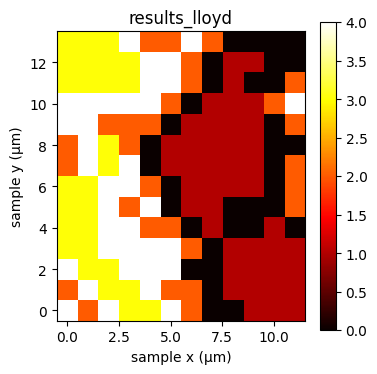

CPU times: user 4.02 s, sys: 484 ms, total: 4.51 s
Wall time: 3.85 s


In [5]:
%%time
##Testing lloyd kmeans

#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_lloyd
importlib.reload(kmeans_lloyd)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 32
images_dct = transform_dct.cal_dct_features(dct_len, dataset)


start = time.time()
kclusters = 5
max_itr = 100
results_lloyd = kmeans_lloyd.kmeans_lloyd_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_lloyd[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_lloyd')
plt.colorbar()
plt.show()




(12, 14, 256, 256)
(168, 1024)
converged in 22 iterations
Elkan dist calculation discarded:  10628
Total Lloyd features in dist calculation:  18923520
Total Elkan features  dist calculation:  8040448
0.1159830093383789


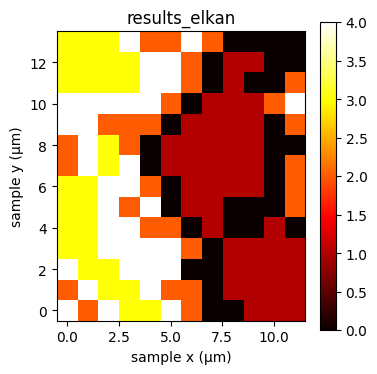

CPU times: user 2.44 s, sys: 249 ms, total: 2.68 s
Wall time: 1.58 s


In [6]:
%%time
##Testing Elkan kmeans (triangled)
#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_elkan
importlib.reload(kmeans_elkan)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 32
images_dct = transform_dct.cal_dct_features(dct_len, dataset)


start = time.time()
kclusters = 5
max_itr = 100
results_elkan = kmeans_elkan.kmeans_elkan_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_elkan[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_elkan')
plt.colorbar()
plt.show()

(12, 14, 256, 256)
(168, 1024)
converged in 22 iterations
Hamerly dist calculation discarded:  2935
Total Lloyd dist features in calculation:  18923520
Total Hamerly dist features in calculation:  15918080
0.0605626106262207


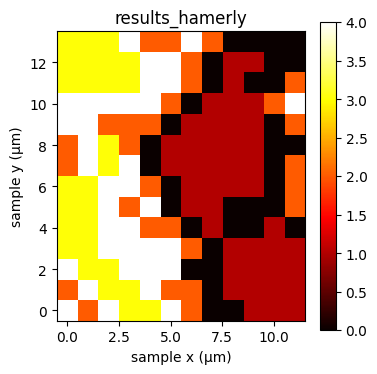

CPU times: user 2.46 s, sys: 263 ms, total: 2.72 s
Wall time: 1.37 s


In [10]:
%%time
##Testing Hamerly kmeans (triangled)
#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_hamerly
importlib.reload(kmeans_hamerly)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 32
images_dct = transform_dct.cal_dct_features(dct_len, dataset)
#images_dct_squared = transform_dct.get_square_squared_sums(images_dct)


start = time.time()
kclusters = 5
max_itr = 100
results_hamerly = kmeans_hamerly.kmeans_hamerly_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_hamerly[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_hamerly')
plt.colorbar()
plt.show()

(12, 14, 256, 256)
(168, 1024)
converged in 22 iterations
Elkan dist calculation discarded:  7487
New_Lemma dist calculation discarded:  3141
Total Lloyd dist features in calculation:  18923520
Total Elkan dist features in calculation:  11256832
Total New_Lemma dist features in calculation:  8040448
0.16950702667236328


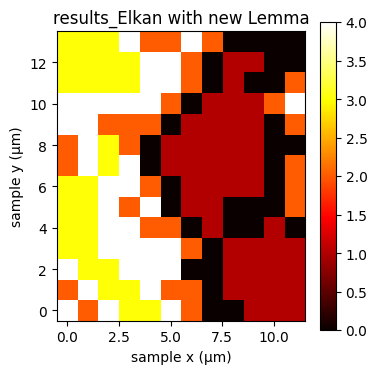

CPU times: user 3.25 s, sys: 288 ms, total: 3.54 s
Wall time: 1.93 s


In [11]:
%%time
##Testing kmeans with Elkan_New_Lemma (triangled)
#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_elkan_new_lemma
importlib.reload(kmeans_elkan_new_lemma)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 32
images_dct = transform_dct.cal_dct_features(dct_len, dataset)
#images_dct_squared = transform_dct.get_square_squared_sums(images_dct)


start = time.time()
kclusters = 5
max_itr = 100
results_lemma3 = kmeans_elkan_new_lemma.kmeans_elkan_new_lemma_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_lemma3[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_Elkan with new Lemma')
plt.colorbar()
plt.show()

(12, 14, 256, 256)
(168, 1024)
converged in 22 iterations
Hamerly dist calculation discarded:  2935
New_Lemma dist calculation discarded:  671
Total Lloyd dist features calculation:  18923520
Total Hamerly dist features in calculation:  15918080
Total New_Lemma dist features in calculation:  15230976
0.065704345703125


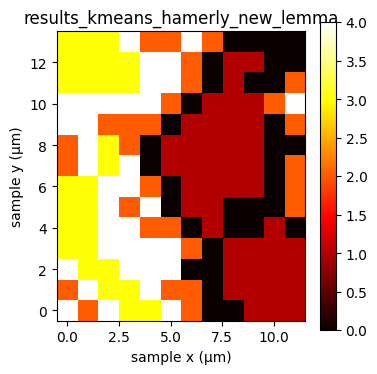

CPU times: user 2.1 s, sys: 253 ms, total: 2.35 s
Wall time: 1.26 s


In [12]:
%%time
##Testing kmeans with Hamerly_New_Lemma (triangled)
#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_hamerly_new_lemma
importlib.reload(kmeans_hamerly_new_lemma)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 32
images_dct = transform_dct.cal_dct_features(dct_len, dataset)
#images_dct_squared = transform_dct.get_square_squared_sums(images_dct)


start = time.time()
kclusters = 5
max_itr = 100
results_lemma3 = kmeans_hamerly_new_lemma.kmeans_hamerly_new_lemma_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_lemma3[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_kmeans_hamerly_new_lemma')
plt.colorbar()
plt.show()

(12, 14, 256, 256)
(168, 1024)
converged in 22 iterations
Elkan dist calculation discarded:  7426
Hamerly dist calculation discarded:  32
New_Lemma dist calculation discarded:  3098
Total Lloyd dist features in calculation:  18923520
Total Elkan dist features in calculation:  11319296
Total Hamerly dist features in calculation:  11286528
Total New_Lemma dist features in calculation:  8114176
0.2523524761199951


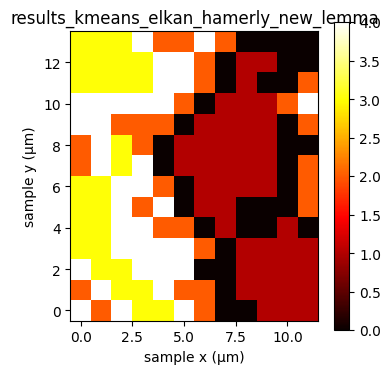

CPU times: user 3.36 s, sys: 243 ms, total: 3.61 s
Wall time: 2.3 s


In [13]:
%%time
##Testing kmeans with Elkan_Hamerly_New_Lemma (triangled)
#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_elkan_hamerly_new_lemma
importlib.reload(kmeans_elkan_hamerly_new_lemma)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 32
images_dct = transform_dct.cal_dct_features(dct_len, dataset)
#images_dct_squared = transform_dct.get_square_squared_sums(images_dct)


start = time.time()
kclusters = 5
max_itr = 100
results_lemma3 = kmeans_elkan_hamerly_new_lemma.kmeans_elkan_hamerly_new_lemma_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_lemma3[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_kmeans_elkan_hamerly_new_lemma')
plt.colorbar()
plt.show()

(12, 14, 256, 256)
(168, 4096)
(168, 7)
converged in 21 iterations
Distance calc access completely discarded through trangle inequality:  17640
Traditional Lloyd total features count for all iterations: 72253440
Stepwise and Triangle Inequality based feature count in distance calculation: 22406160.0
Percentage of discarded features by the stepwise method for all iterations: 68.98949032738095%
5.8914947509765625


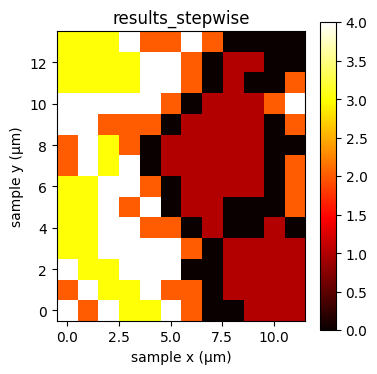

CPU times: user 9.36 s, sys: 290 ms, total: 9.65 s
Wall time: 8.32 s


In [14]:
%%time
##Testing stepwise kmeans
#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_stepwise
importlib.reload(kmeans_stepwise)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 64
images_dct = transform_dct.cal_dct_features(dct_len, dataset)
images_dct_squared = transform_dct.get_square_squared_sums(images_dct)


start = time.time()
kclusters = 5
max_itr = 100
results_stepwise = kmeans_stepwise.kmeans_stepwise_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_stepwise[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_stepwise')
plt.colorbar()
plt.show()

(12, 14, 256, 256)
(168, 4096)
converged in 21 iterations
Distance calc access completely discarded through trangle inequality:  16734
Traditional Lloyd total features count for all iterations: 72253440
Stepwise and Triangle Inequality based feature count in distance calculation: 21958896.0
Percentage of discarded features by the stepwise method for all iterations: 69.60851137329932%
4.727879762649536


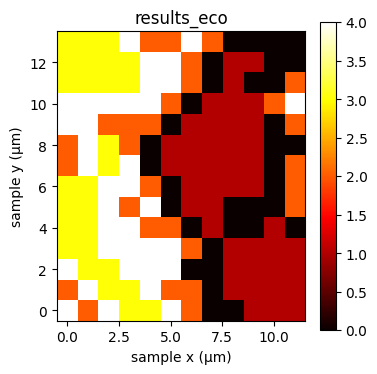

CPU times: user 7.86 s, sys: 342 ms, total: 8.2 s
Wall time: 6.77 s


In [15]:
%%time
##Testing eco kmeans
#Importing required modules
import importlib #In case of need: Freshly reload the import modules
import kmeans_eco
importlib.reload(kmeans_eco)
import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 64
images_dct = transform_dct.cal_dct_features(dct_len, dataset)
#images_dct_squared = transform_dct.get_square_squared_sums(images_dct)


start = time.time()
kclusters = 5
max_itr = 100
results_eco = kmeans_eco.kmeans_eco_manual(images_dct, kclusters, max_itr)
end = time.time()
print(end - start)


#%%time
import matplotlib.pyplot as plt
results = np.array(results_eco[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_eco')
plt.colorbar()
plt.show()

(12, 14, 256, 256)
(168, 64)
(168, 4)
Current Kmean:  lloyd
converged in 28 iterations
Total Lloyd features in dist calculation:  1505280
Time used:  0.239973783493042
Current Kmean:  elkan
converged in 28 iterations
Elkan dist calculation discarded:  13874
Total Lloyd features in dist calculation:  1505280
Total Elkan features  dist calculation:  617344
Time used:  0.15086746215820312
Current Kmean:  hamerly
converged in 28 iterations
Hamerly dist calculation discarded:  4079
Total Lloyd dist features in calculation:  1505280
Total Hamerly dist features in calculation:  1244224
Time used:  0.06073307991027832
Current Kmean:  elkan_new_lemma
converged in 28 iterations
Elkan dist calculation discarded:  9456
New_Lemma dist calculation discarded:  4418
Total Lloyd dist features in calculation:  1505280
Total Elkan dist features in calculation:  900096
Total New_Lemma dist features in calculation:  617344
Time used:  0.13625073432922363
Current Kmean:  hamerly_new_lemma
converged in 28 it

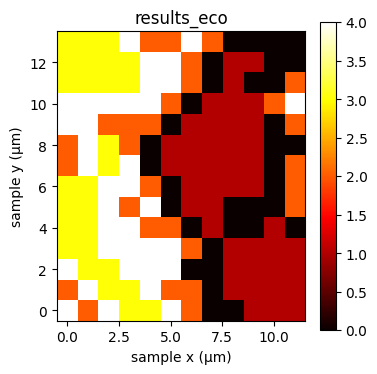

CPU times: user 5.24 s, sys: 246 ms, total: 5.49 s
Wall time: 4.38 s


In [16]:
%%time
##Testing all kmeans
#Importing required modules
import importlib #In case of need: Freshly reload the import modules

#import required kmeans files
import kmeans_lloyd
importlib.reload(kmeans_lloyd)

import kmeans_elkan
importlib.reload(kmeans_elkan)

import kmeans_hamerly
importlib.reload(kmeans_hamerly)

import kmeans_elkan_new_lemma
importlib.reload(kmeans_elkan_new_lemma)

import kmeans_hamerly_new_lemma
importlib.reload(kmeans_hamerly_new_lemma)

import kmeans_elkan_hamerly_new_lemma
importlib.reload(kmeans_elkan_hamerly_new_lemma)

import kmeans_stepwise
importlib.reload(kmeans_stepwise)

import kmeans_eco
importlib.reload(kmeans_eco)

import transform_dct
importlib.reload(transform_dct)

print(dataset.shape)
dct_len = 8
images_dct = transform_dct.cal_dct_features(dct_len, dataset)
images_dct_squared = transform_dct.get_square_squared_sums(images_dct)

def run_kmeans(version):
    print('Current Kmean: ', version)
    kclusters = 5
    max_itr = 100

    if version == 'lloyd':
        start = time.time()
        results_lloyd = kmeans_lloyd.kmeans_lloyd_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)
    elif version == 'elkan':
        start = time.time()
        results_elkan = kmeans_elkan.kmeans_elkan_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)
    elif version == 'hamerly':
        start = time.time()
        results_hamerly = kmeans_hamerly.kmeans_hamerly_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)
    elif version == 'elkan_new_lemma':
        start = time.time()
        results_elkan_new_lemma = kmeans_elkan_new_lemma.kmeans_elkan_new_lemma_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)
    elif version == 'hamerly_new_lemma':
        start = time.time()
        results_hamerly_new_lemma = kmeans_hamerly_new_lemma.kmeans_hamerly_new_lemma_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)
    elif version == 'elkan_hamerly_new_lemma':
        start = time.time()
        results_elkan_hamerly_new_lemma = kmeans_elkan_hamerly_new_lemma.kmeans_elkan_hamerly_new_lemma_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)
    elif version == 'stepwise':
        start = time.time()
        results_stepwise = kmeans_stepwise.kmeans_stepwise_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)
    elif version == 'eco':
        start = time.time()
        results_eco = kmeans_eco.kmeans_eco_manual(images_dct, kclusters, max_itr)
        end = time.time()
        print('Time used: ', end - start)


run_kmeans('lloyd')
run_kmeans('elkan')
run_kmeans('hamerly')
run_kmeans('elkan_new_lemma')
run_kmeans('hamerly_new_lemma')
run_kmeans('elkan_hamerly_new_lemma')
run_kmeans('stepwise')
run_kmeans('eco')


#%%time
import matplotlib.pyplot as plt
results = np.array(results_lloyd[0])
learning_result = results.reshape(dataset.shape[0],dataset.shape[1])
#learning_result = results.reshape(35,42)
fig = plt.figure(figsize=(4,4))
plt.imshow(np.transpose(learning_result), cmap='hot', interpolation='none',origin='lower')
#plt.imshow(np.transpose(learning_result), cmap='Accent', interpolation='none',origin='lower', extent=smx_smy_extent, aspect=1)
plt.xlabel('sample x (μm)')
plt.ylabel('sample y (μm)')
plt.title('results_eco')
plt.colorbar()
plt.show()

256 256
2
(65536,)
image 256
Number of images in cluster: 0 = 14
(65536,)
image 256
Number of images in cluster: 1 = 106
(65536,)
image 256
Number of images in cluster: 2 = 16
(65536,)
image 256
Number of images in cluster: 3 = 2
(65536,)
image 256
Number of images in cluster: 4 = 30
CPU times: total: 766 ms
Wall time: 765 ms


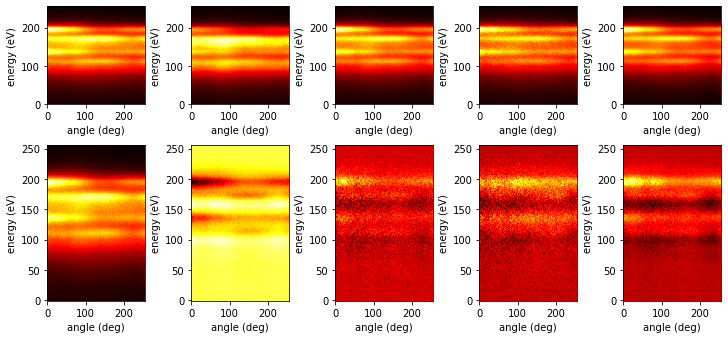

In [ ]:
%%time
#Plotting the clusters
import matplotlib.pyplot as plt
from itertools import *

results = results_eco[0]

ncols=kclusters
#fig, axes = plt.subplots(ncols=ncols, nrows=1, figsize=(ncols*4,4))
fig, axes = plt.subplots(ncols=ncols, nrows=2, figsize=(ncols*2,5),constrained_layout=True)

data_x = dataset.shape[0]
data_y = dataset.shape[1]
pix_x = dataset.shape[2]
pix_y = dataset.shape[3]

print(pix_x, pix_y)
print(results[10])

for j in range (0,kclusters):
    cluster_mean_image = np.zeros(pix_x * pix_y)
    numcluster = 0

    print(cluster_mean_image.shape)
    print('image', len(images[0]))

    for i in range(0,data_x*data_y):
        if (results[i] == j):
            cluster_mean_image += list(chain.from_iterable(images[i]))
            numcluster += 1
    cluster_mean_image = cluster_mean_image/numcluster
    print("Number of images in cluster:",j,"=",numcluster)
    axes[0,j].imshow(np.transpose(cluster_mean_image.reshape(pix_x,pix_y)), cmap='hot', interpolation='nearest',origin='lower')
    axes[0,j].set_xlabel('angle (deg)')
    axes[0,j].set_ylabel('energy (eV)')


    if j == 0:
        first_image = cluster_mean_image
        axes[1,j].imshow(np.transpose(first_image.reshape(pix_x,pix_y)), cmap='hot', aspect='auto', interpolation='nearest',origin='lower')
        axes[1,j].set_xlabel('angle (deg)')
        axes[1,j].set_ylabel('energy (eV)')
    else:
        difference = cluster_mean_image-first_image
        axes[1,j].imshow(np.transpose(difference.reshape(pix_x,pix_y)), cmap='hot', aspect='auto', interpolation='nearest',origin='lower')
        axes[1,j].set_xlabel('angle (deg)')
        axes[1,j].set_ylabel('energy (eV)')

CPU times: total: 1.03 s
Wall time: 1.08 s


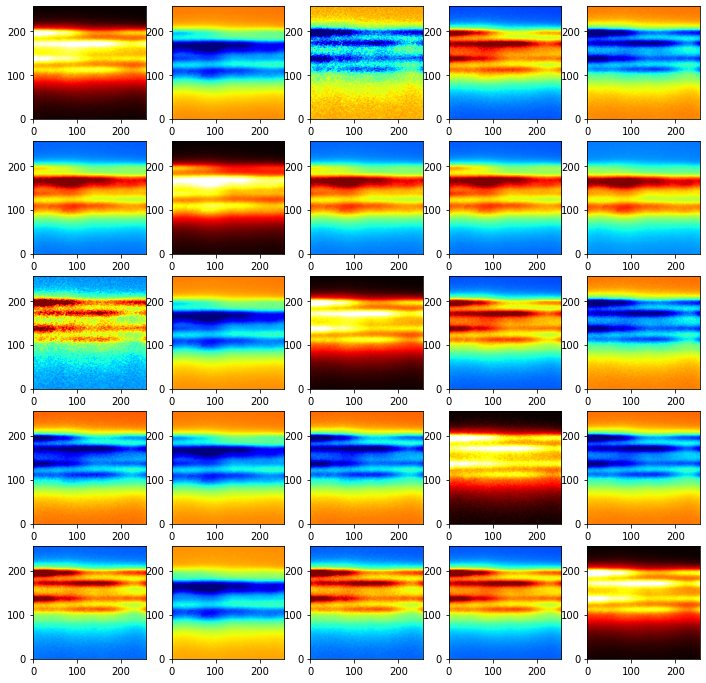

In [ ]:
%%time
#Plotting the cluster differences
import matplotlib.pyplot as plt
from itertools import *

results = results_eco[0]
shape = dataset.shape[2],dataset.shape[3]

cluster_means = []
clusetr_nums = []
for i in range(kclusters):
    cluster_mean_image = np.zeros(np.prod(shape))
    numcluster = 0
    for j in range(0,len(images)):
        if (results[j] == i):
            cluster_mean_image += list(chain.from_iterable(images[j]))
            numcluster += 1
    cluster_means.append(cluster_mean_image.reshape(shape).T)
    clusetr_nums.append(numcluster)
f,ax = plt.subplots(kclusters,kclusters,figsize=(12,12))
for i in range(kclusters):
    for j in range(kclusters):
        if i == j:
            img = cluster_means[i]
            cmap = 'hot'
            clim=np.quantile(img,(0.02,0.98))
        else:
            img = cluster_means[i] - cluster_means[j]
            img -= img.mean()
            cmap = 'jet'
            minmax = max(-np.quantile(img,0.02),np.quantile(img,0.98))
            clim=(-minmax,minmax)
        ax[i,j].imshow(img,origin='lower',clim=clim,cmap=cmap)
            